# Exercises in statistics

In [146]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

## Exercise 1

In this exercise we will use the penguins dataset (can be imported using the code `penguins_data = sns.load_dataset("penguins")`

Please answer the following questions:
1. For the different species of penguins (Adelie, Chinstrap, and Gentoo), how many penguins are there of each species?
2. For the different species of penguins (Adelie, Chinstrap, and Gentoo), is the body mass variable normally distributed?
3. Test whether there is a difference in body mass for Adelie penguins and Chinstrap penguins. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.
4. Test whether there is a difference in body mass for Chinstrap penguins and Gentoo penguins. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.

In [149]:
penguins_data = sns.load_dataset("penguins")

In [5]:
penguins_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [151]:
print(penguins_data.isna().sum())

penguins_data = penguins_data.dropna()

print(penguins_data.isna().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


## 1. For the different species of penguins (Adelie, Chinstrap, and Gentoo), how many penguins are there of each species?

In [28]:
penguins_data["species"].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

## 2. For the different species of penguins (Adelie, Chinstrap, and Gentoo), is the body mass variable normally distributed?

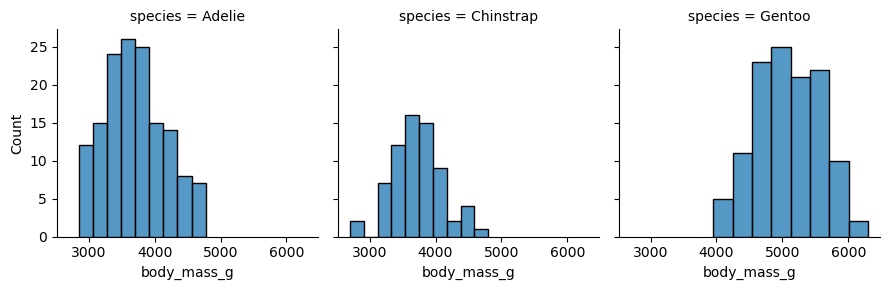

In [20]:
g=sns.FacetGrid(penguins_data, col="species")
g.map(sns.histplot, "body_mass_g")

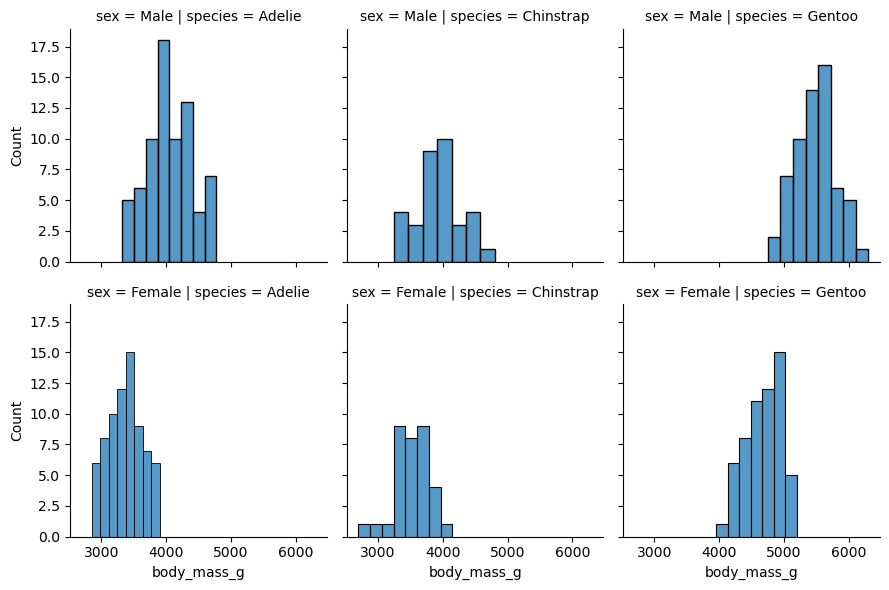

In [19]:
g=sns.FacetGrid(penguins_data, col="species", row="sex")
g.map(sns.histplot, "body_mass_g")

## 3. Test whether there is a difference in body mass for Adelie penguins and Chinstrap penguins. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use.

### Hypothesis, acceptable p-value less than 0.05
    The null hypothesis is that there is no significant difference between penguin species and their body mass

    The alternative hypothesis is that there is a small difference of body mass between different penguin species

In [26]:
Adelie = penguins_data[penguins_data["species"]=="Adelie"]["body_mass_g"]
Chinstrap = penguins_data[penguins_data["species"]=="Chinstrap"]["body_mass_g"]

print(stats.ttest_ind(Adelie.head(20), Chinstrap.head(20)))

print(stats.ttest_ind(Adelie, Chinstrap))

TtestResult(statistic=0.19095034415279136, pvalue=0.8495810695738127, df=38.0)
TtestResult(statistic=-0.42011219955863177, pvalue=0.6748289682757558, df=212.0)


    Given the pvalue=0.8495810695738127, which is much higher than the significance level we have chosen of 0.05 for p
    we can then not reject the null hypothesis and declare that there is no significant difference between penguin species and their body mass

## 4. Test whether there is a difference in body mass for Chinstrap penguins and Gentoo penguins. Remember to justify your choice of test. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use.

### Hypothesis, acceptable p-value less than 0.05
    The null hypothesis is that there is no significant difference between penguin species and their body mass

    The alternative hypothesis is that there is a clear difference of body mass between different penguin species

In [34]:
Chinstrap = penguins_data[penguins_data["species"]=="Chinstrap"]["body_mass_g"]
Gentoo = penguins_data[penguins_data["species"]=="Gentoo"]["body_mass_g"]

print(stats.ttest_ind(Chinstrap.head(20), Gentoo.head(20)))

print(stats.ttest_ind(Chinstrap, Gentoo))

TtestResult(statistic=-8.53284675147811, pvalue=2.3110622048372052e-10, df=38.0)
TtestResult(statistic=-19.33454832714746, pvalue=2.781745579785546e-46, df=185.0)


    Given the pvalue=2.781745579785546e-46, which is much higher than the significance level we have chosen of 0.05 for p
    we can then not drop the null hypothesis and declare there is a clear difference of body mass between different penguin species

## Exercise 2

Load in the "fb_like_and_share.csv" data and answer the following questions:

1. Is there a difference in the distribution of likes for photos and videos? Justify your choice of test(s).
2. Is there a difference in the distribution of share counts for photos and videos? Justify your choice of test(s).
3. Perform an ANOVA test to test if there is a difference in means across type of posts for shares. Does it make sense to perform this ANOVA test?
4. Is there actually a statistical significant difference in the distribution of share counts for any two groups?

In [153]:
fb = pd.read_csv('../Notebooks and data4/fb_like_and_share.csv', sep=";")

In [155]:
fb

,type,likes_count_fb,shares_count_fb
0,video,577,7
1,photo,2802,23
2,video,490,14
3,link,535,16
4,photo,1049,44
5,photo,1557,85
6,photo,838,1
7,status,467,4
8,photo,100,1
9,video,112,3


In [38]:
fb.isna().sum()

type               0
likes_count_fb     0
shares_count_fb    0
dtype: int64

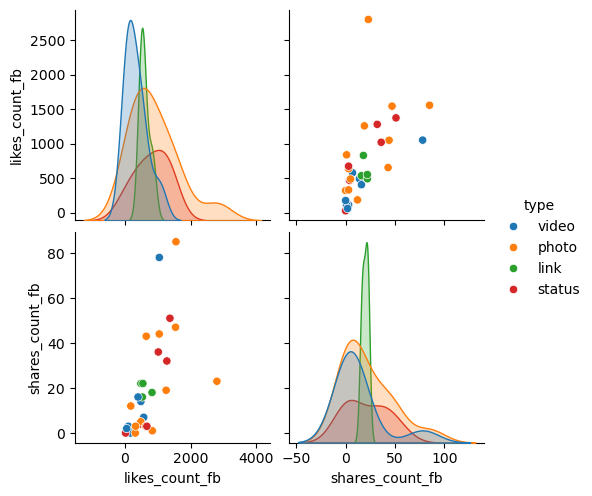

In [113]:
sns.pairplot(data = fb, hue="type")

### 1. Is there a difference in the distribution of likes for photos and videos? Justify your choice of test(s).

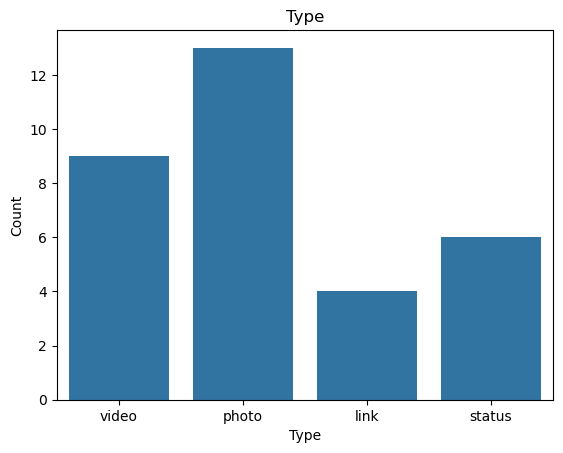

In [42]:
sns.countplot(x = "type", data = fb)
plt.title("Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

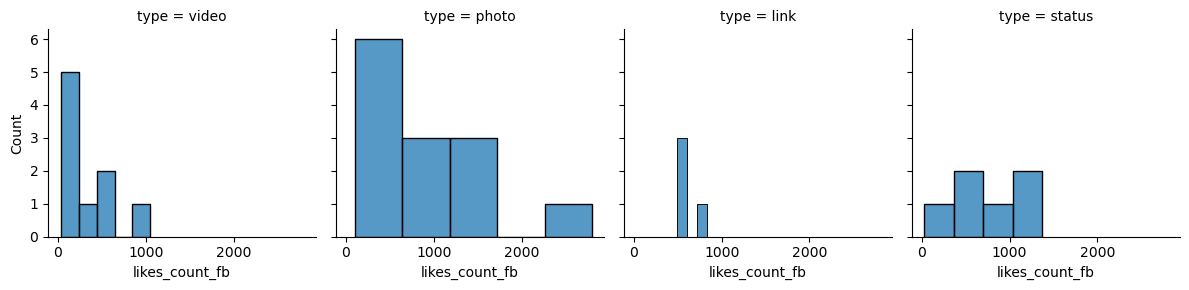

In [49]:
g=sns.FacetGrid(fb, col="type")
g.map(sns.histplot, "likes_count_fb")

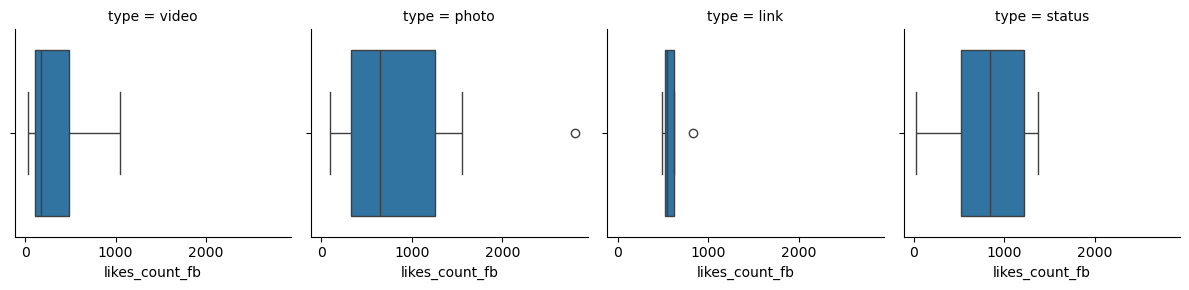

In [117]:
g=sns.FacetGrid(fb, col="type")
g.map(sns.boxplot, "likes_count_fb", order=None)

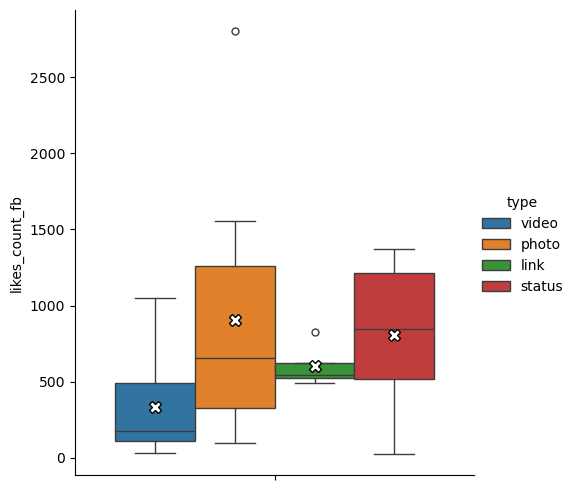

In [132]:
sns.catplot(y="likes_count_fb", hue = "type", data = fb, kind="box", height = 5, showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "8"})
plt.show()

### Hypothesis, acceptable p-value less than 0.05
    The null hypothesis is that there is no significant difference between distribution of likes for video and photo likes

    The alternative hypothesis is that there is a significant difference between distribution of likes for video and photo likes

#### Given the data is numeric, not normally distributed as seen in the graph above, and that the data is not paired and the group (video and photo) does not have the same distribution shape(13 and 9) the mannwhitneyu test is most suited to test our hypothesis

In [ ]:
#video = fb[fb["type"]=="video"]["likes_count_fb"]
#photo = fb[fb["type"]=="photo"]["likes_count_fb"]
#link = fb[fb["type"]=="link"]["likes_count_fb"]
#status = fb[fb["type"]=="status"]["likes_count_fb"]

#stats.f_oneway(video, photo, link, status) 

In [125]:
video = fb[fb["type"]=="video"]["likes_count_fb"]
photo = fb[fb["type"]=="photo"]["likes_count_fb"]

print(stats.ttest_ind(video.head(7), photo.head(7)))

print(stats.ttest_ind(video, photo))

TtestResult(statistic=-2.213829984385548, pvalue=0.04695626448637993, df=12.0)
TtestResult(statistic=-2.125454058083514, pvalue=0.04619850270741724, df=20.0)


In [128]:
video = fb[fb["type"]=="video"]["likes_count_fb"]
photo = fb[fb["type"]=="photo"]["likes_count_fb"]

stats.mannwhitneyu(video, photo)

MannwhitneyuResult(statistic=26.0, pvalue=0.0326063047830172)

    Given the pvalue=0.0326063047830172, which is sliglhtly smaller than the significance level we have chosen of 0.05 for p
    we can then drop the null hypothesis and declare there is a significant difference between distribution of likes for video and photo likes

### 2. Is there a difference in the distribution of share counts for photos and videos? Justify your choice of test(s).

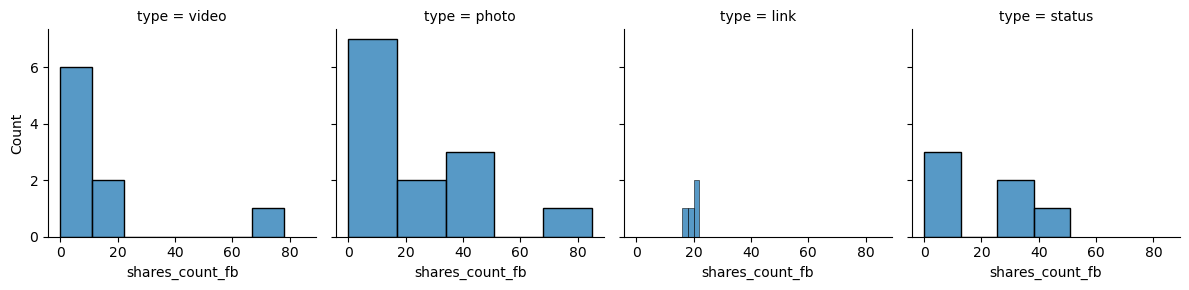

In [130]:
g=sns.FacetGrid(fb, col="type")
g.map(sns.histplot, "shares_count_fb")

In [166]:
#g=sns.FacetGrid(fb, col="type")
#g.map(sns.boxplot, "shares_count_fb", order=None)

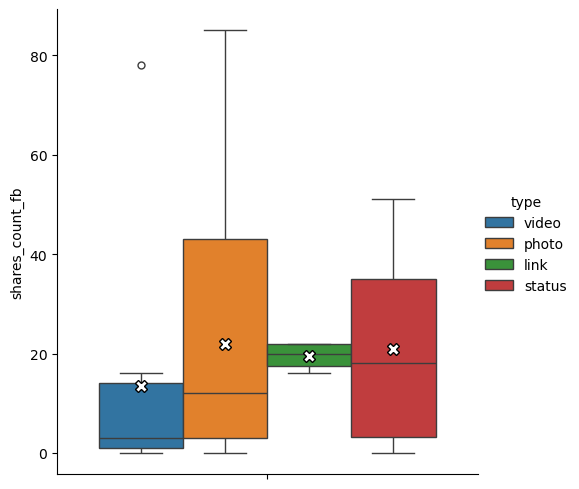

In [91]:
sns.catplot(y="shares_count_fb", hue = "type", data = fb, kind="box", height = 5, showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "8"})
plt.show()

### Hypothesis, acceptable p-value less than 0.05
    The null hypothesis is that there is no significant difference between distribution of share count for video and photo likes

    The alternative hypothesis is that there is a significant difference between distribution of share count for video and photo likes

#### Given the data is numeric, not normally distributed as seen in the graph above, and that the data is not paired and the group (video and photo) does not have the same distribution shape(13 and 9) the Mann-Whitney test is most suited to test our hypothesis

In [170]:
video = fb[fb["type"]=="video"]["shares_count_fb"]
photo = fb[fb["type"]=="photo"]["shares_count_fb"]

# I see the graph and i CLEARLY see a difference i the distribution of shares between video and photo, but the test says otherwise, is it wrong test?
stats.mannwhitneyu(video, photo) 

MannwhitneyuResult(statistic=42.0, pvalue=0.28368085995763015)

    Given the pvalue=0.28368085995763015, which is greater than the significance level we have chosen of 0.05 for p
    we can then not reject the null hypothesis and declare that there is no significant difference between distribution of share count for video and photo likes

### 3. Perform an ANOVA test to test if there is a difference in means across type of posts for shares. Does it make sense to perform this ANOVA test?

In [176]:
fb.groupby("type")["shares_count_fb"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
link,4.0,19.500000,3.000000,16.0,17.50,20.0,22.0,22.0
photo,13.0,22.000000,25.829570,0.0,3.00,12.0,43.0,85.0
status,6.0,21.000000,21.447611,0.0,3.25,18.0,35.0,51.0
video,9.0,13.444444,24.930459,0.0,1.00,3.0,14.0,78.0


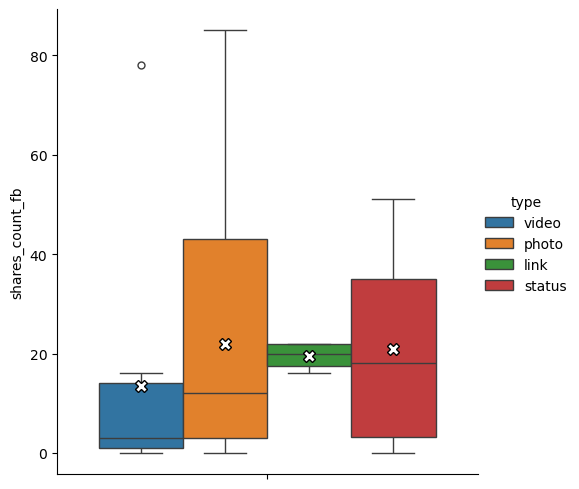

In [178]:
sns.catplot(y="shares_count_fb", hue = "type", data = fb, kind="box", height = 5, showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "8"})
plt.show()

In [58]:
video = fb[fb["type"]=="video"]["shares_count_fb"]
photo = fb[fb["type"]=="photo"]["shares_count_fb"]
link = fb[fb["type"]=="link"]["shares_count_fb"]
status = fb[fb["type"]=="status"]["shares_count_fb"]

stats.f_oneway(video, photo, link, status) 

F_onewayResult(statistic=0.2558147061883985, pvalue=0.8565314091757278)

    so pvalue=0.8565314091757278, which means what? that there is a no significant difference in their mean value? doesn't look like that tough.
    We did the Mann-Whitney test before on photo, video for like and share and saw a mixed result, but saw one of them to be true.
    The ANOVA test would probably be done before doing individual test, doesn't make much sense to do it at this stage for the test itself

### 4. Is there actually a statistical significant difference in the distribution of share counts for any two groups?

In [194]:
video = fb[fb["type"]=="video"]["shares_count_fb"]
photo = fb[fb["type"]=="photo"]["shares_count_fb"]
link = fb[fb["type"]=="link"]["shares_count_fb"]
status = fb[fb["type"]=="status"]["shares_count_fb"]

# I see the graph and i CLEARLY see a difference in the distribution of shares between video and photo, but the test says otherwise, is it wrong test?
print("video x photo", stats.mannwhitneyu(video, photo))
print("video x link", stats.mannwhitneyu(video, link))
print("video x status", stats.mannwhitneyu(video, status))

print("photo x link", stats.mannwhitneyu(photo, link))
print("photo x status", stats.mannwhitneyu(photo, status))

print("link x status", stats.mannwhitneyu(link, status))

video x photo MannwhitneyuResult(statistic=42.0, pvalue=0.28368085995763015)
video x link MannwhitneyuResult(statistic=4.5, pvalue=0.04398211202214717)
video x status MannwhitneyuResult(statistic=19.5, pvalue=0.40729365298228914)
photo x link MannwhitneyuResult(statistic=22.0, pvalue=0.6913472082637717)
photo x status MannwhitneyuResult(statistic=38.5, pvalue=1.0)
link x status MannwhitneyuResult(statistic=12.0, pvalue=1.0)


    Between video and link there is a pvalue of 0.043 which is under the previous selected level, but all the others are
    significant above that with two of the values being 1, in general it could be said that there is no real significant,
    ephasis on significant, difference between the distribution of share counts for any two groups.
    But yes video and link does have a decent pvalue

## Exercise 3

Load in the data "energySoftware.csv" and answer the following questions:
1. Plot the distribution of CPU for each test type
2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 
3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?
4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
5. Perform an ANOVA test to test if there is a difference in means across groups for CPU
6. Perform an ANOVA test to test if there is a difference in means across groups for time

In [213]:
df = fb = pd.read_csv('../Notebooks and data4/energySoftware.csv')

In [215]:
df

,test,PKG,CPU,nn,nn2,time
0,bubblesort,0.010986,0.009155,,,3.165
1,bubblesort,0.013184,0.010925,,,3.069
2,bubblesort,0.015198,0.009399,,,2.617
3,bubblesort,0.010559,0.009583,,,2.572
4,bubblesort,0.009949,0.009949,,,2.671
...,...,...,...,...,...,...
1436,bubblesort_ll,0.013184,0.014038,,,2.394
1437,bubblesort_ll,0.021362,0.014343,,,2.428
1438,bubblesort_ll,0.013672,0.014221,,,2.479
1439,bubblesort_ll,0.019531,0.014526,,,2.537


In [223]:
df.describe()

,PKG,CPU,time
count,1441.000000,1441.000000,1441.000000
mean,0.017618,0.015021,3.009384
std,0.004464,0.003192,0.571439
min,0.008179,0.007812,1.962000
25%,0.013733,0.012939,2.462000
50%,0.017761,0.015747,3.363000
75%,0.020874,0.017822,3.524000
max,0.026794,0.020325,4.244000


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   test    1441 non-null   object 
 1   PKG     1441 non-null   float64
 2   CPU     1441 non-null   float64
 3   nn      1441 non-null   object 
 4   nn2     1441 non-null   object 
 5   time    1441 non-null   float64
dtypes: float64(3), object(3)
memory usage: 67.7+ KB


In [225]:
df["test"].value_counts()

test
bubblesort         361
bubblesort_func    360
bubblesort_ll2     360
bubblesort_ll      360
Name: count, dtype: int64

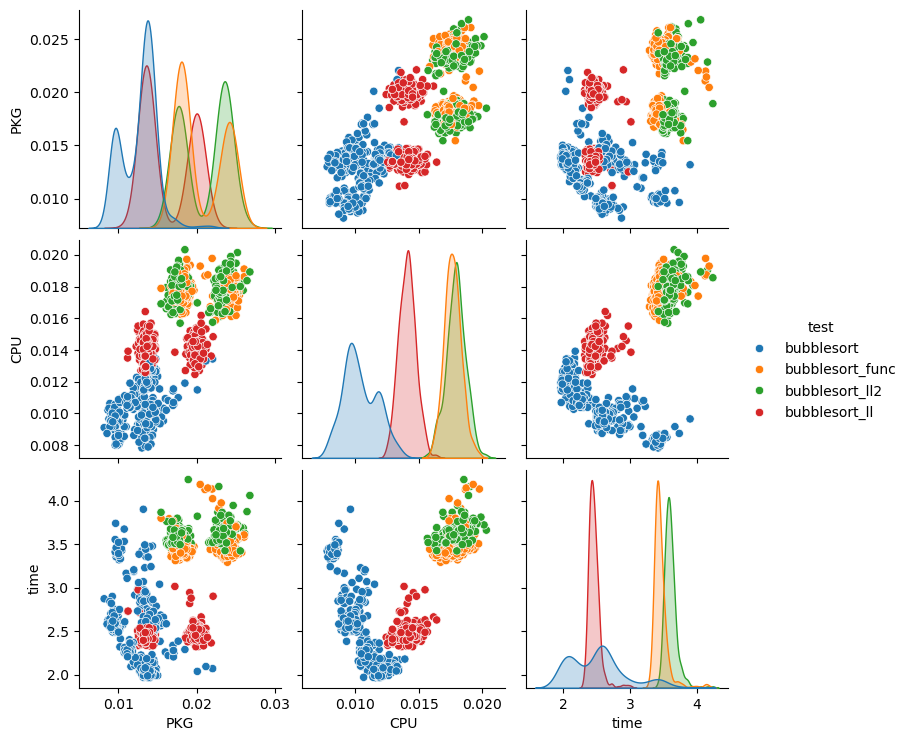

In [227]:
sns.pairplot(data = df, hue="test")

### 1. Plot the distribution of CPU for each test type

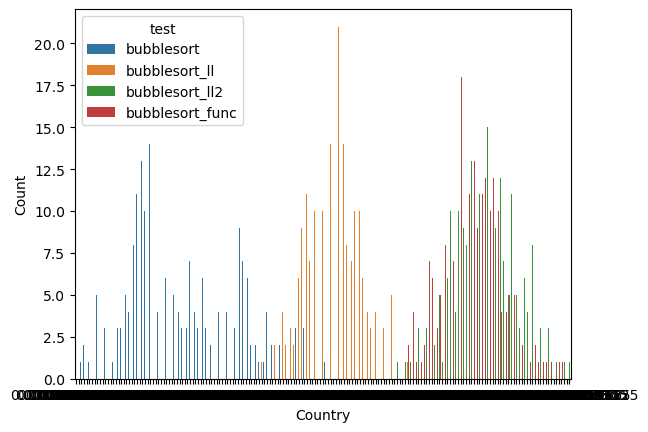

In [231]:
sns.countplot(x = "CPU", data = df, hue="test")
plt.xlabel("CPU")
plt.ylabel("Count")
plt.show()

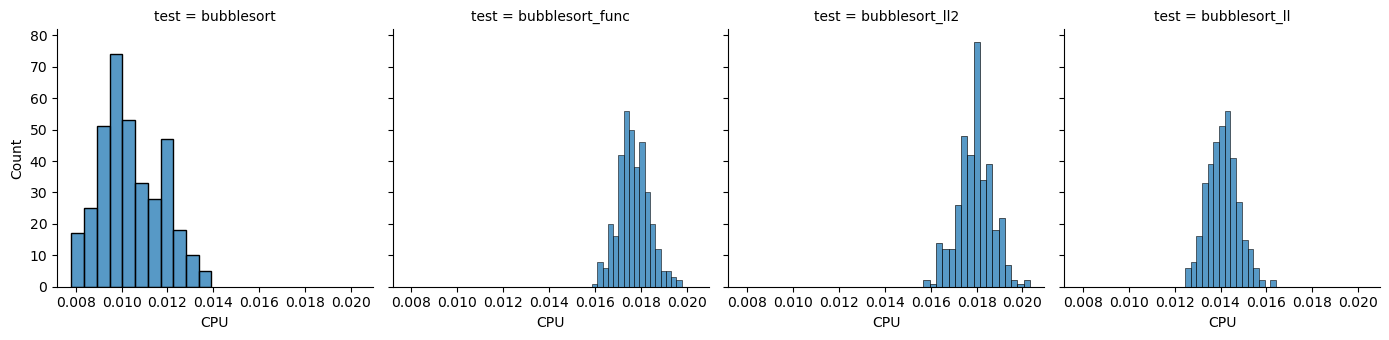

In [275]:
g=sns.FacetGrid(df, col="test", height=3.5)
g.map(sns.histplot, "CPU")

### 2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 

In [279]:
df["test"].value_counts()

test
bubblesort         361
bubblesort_func    360
bubblesort_ll2     360
bubblesort_ll      360
Name: count, dtype: int64

Given the data is numeric, is normally distributed as seen in the graph above, and that the smaple size is greater than 30(medium, see above), data is not paired, the best suitable option is Student t-test to test our hypothesis

In [286]:
bubblesort = df[df["test"]=="bubblesort"]["CPU"]
bubblesort_ll = df[df["test"]=="bubblesort_ll"]["CPU"]

print(stats.ttest_ind(bubblesort.head(20), bubblesort_ll.head(20)))

print(stats.ttest_ind(bubblesort, bubblesort_ll))

TtestResult(statistic=-19.7429499074299, pvalue=1.415663216996009e-21, df=38.0)
TtestResult(statistic=-47.4605163039462, pvalue=9.831404686370246e-224, df=719.0)


    Given the pvalue=9.831404686370246e-224, which is much lower than the significance level we have chosen of 0.05 for p
    we can then reject the null hypothesis and declare that there is a significant difference in the CPU between bubblesort and bubblesort_ll

### 3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?

Given the data, CPU, is numeric, is normally distributed as seen in the graph above, and that the smaple size is greater than 30(medium, see above), data is not paired, the best suitable option is Student t-test to test our hypothesis.

Same as the scenario above!

In [291]:
bubblesort_func = df[df["test"]=="bubblesort_func"]["CPU"]
bubblesort_ll2 = df[df["test"]=="bubblesort_ll2"]["CPU"]

print(stats.ttest_ind(bubblesort_func.head(20), bubblesort_ll2.head(20)))

print(stats.ttest_ind(bubblesort_func, bubblesort_ll2))

TtestResult(statistic=-1.460198280525312, pvalue=0.15245454046335788, df=38.0)
TtestResult(statistic=-4.692273179928857, pvalue=3.2355729348933066e-06, df=718.0)


    Given the pvalue=3.2355729348933066e-06, which is much lower than the significance level we have chosen of 0.05 for p
    we can then reject the null hypothesis and declare that there is a significant difference in the CPU between bubblesort_func and bubblesort_ll2

### 4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).

Given the data, time, is numeric, is normally distributed as seen in the graph above, and that the smaple size is greater than 30(medium, see above), data is not paired, the best suitable option is Student t-test to test our hypothesis.

Same as the scenario above!

In [315]:
bubblesort = df[df["test"]=="bubblesort"]["time"]
bubblesort_ll = df[df["test"]=="bubblesort_ll"]["time"]

print(stats.ttest_ind(bubblesort.head(20), bubblesort_ll.head(20)))

print(stats.ttest_ind(bubblesort, bubblesort_ll))

TtestResult(statistic=4.200705061924748, pvalue=0.00015498395175156718, df=38.0)
TtestResult(statistic=2.6869646116756063, pvalue=0.007377079277349758, df=719.0)


    Given the pvalue=0.007377079277349758, which is lower than the significance level we have chosen of 0.05 for p
    we can then reject the null hypothesis and declare that there is a significant difference in the time between bubblesort and bubblesort_ll

### 5. Perform an ANOVA test to test if there is a difference in means across groups for CPU

In [324]:
df["test"].value_counts()

test
bubblesort         361
bubblesort_func    360
bubblesort_ll2     360
bubblesort_ll      360
Name: count, dtype: int64

In [348]:
bubblesort = df[df["test"]=="bubblesort"]["CPU"]
bubblesort_func = df[df["test"]=="bubblesort_func"]["CPU"]
bubblesort_ll = df[df["test"]=="bubblesort_ll"]["CPU"]
bubblesort_ll2 = df[df["test"]=="bubblesort_ll2"]["CPU"]

stats.f_oneway(bubblesort, bubblesort_ll, bubblesort_func, bubblesort_ll2)   

F_onewayResult(statistic=5641.937696029289, pvalue=0.0)

In [364]:
df.groupby("test")["CPU"].describe()

,count,mean,std,min,25%,50%,75%,max
test,,,,,,,,
bubblesort,361.0,0.010412,0.001316,0.007812,0.009460,0.010132,0.011597,0.013916
bubblesort_func,360.0,0.017669,0.000663,0.015869,0.017212,0.017639,0.018066,0.019775
bubblesort_ll,360.0,0.014097,0.000662,0.012451,0.013611,0.014099,0.014526,0.016418
bubblesort_ll2,360.0,0.017919,0.000763,0.015686,0.017456,0.017944,0.018433,0.020325


    The test has a pvalue= 0.0 which mean that there is a difference in the means across the groups for CPU
    As well as the table above show a difference in mean and more!

### 6. Perform an ANOVA test to test if there is a difference in means across groups for time

In [350]:
bubblesort = df[df["test"]=="bubblesort"]["time"]
bubblesort_func = df[df["test"]=="bubblesort_func"]["time"]
bubblesort_ll = df[df["test"]=="bubblesort_ll"]["time"]
bubblesort_ll2 = df[df["test"]=="bubblesort_ll2"]["time"]

stats.f_oneway(bubblesort, bubblesort_ll, bubblesort_func, bubblesort_ll2)  

F_onewayResult(statistic=2556.3329354127823, pvalue=0.0)

In [358]:
df.groupby("test")["time"].describe()

,count,mean,std,min,25%,50%,75%,max
test,,,,,,,,
bubblesort,361.0,2.518892,0.419260,1.962,2.146,2.5410,2.67600,3.902
bubblesort_func,360.0,3.456836,0.115992,3.292,3.395,3.4285,3.48400,4.188
bubblesort_ll,360.0,2.458178,0.089711,2.320,2.405,2.4430,2.49100,3.014
bubblesort_ll2,360.0,3.604994,0.094482,3.423,3.546,3.5905,3.64375,4.244


    The test has a pvalue= 0.0 which mean that there is a difference in the means across the groups for time
    As well as the table above show a difference in mean and more!